# Homework #10

## PHYS 2600, Spring 2019

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend restarting the kernel and selecting "Cells > Run All" in the menu above before you submit.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

## 10.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on your _last graded_ homework assignment.  If you got a perfect score, great, tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

Part B, Input 11

def solve_motion(t, v_0, b, c):
    g = 9.8  # m/s^2
    m = 1    # kg
    
    ## YOUR CODE HERE
    (v_x0, v_y0) = v_0
    t_max = len(t)
    dt = t[t_max-1]/t_max

    x = np.zeros(t)
    y = np.zeros(t)
    vx = np.zeros(t)
    vy = np.zeros(t)

    vx[0] = v_x0
    vy[0] = v_y0

    for i in range(0,t_max-1,1):
        x[i+1] = x[i] + vx[i]*dt
        y[i+1] = y[i] + vy[i]*dt
        v = (vx[i]**2+vy[i]**2)**0.5
        vx[i+1] = v - (b*vx[i] + c*vx[i]*v)*dt
        vy[i+1] = v - (m*g + b*vy[i] + c*vy[i]*v)*dt

    return (x,y)

## 10.1 - Fun and games in Python (13 points)


### Part A (3 points)

Below is a list containing each card in a standard deck of 52 playing cards.  Each card has a __rank__, ranging from the numbers 2-10 or the "royal" values J/Q/K/A, and a __suit__, one of spades/clubs/hearts/diamonds (♠︎/♣︎/♥︎/♦︎).

__Write a function `deal_hand(n)`__ that will produce a list of $n$ cards, _drawn without replacement_ from the `deck` list.  (_Hint: your function can easily be one line long!_)

In [2]:
deck = [
    '2♠︎', '3♠︎', '4♠︎', '5♠︎', '6♠︎', '7♠︎', '8♠︎', '9♠︎', '10♠︎', 'J♠︎', 'Q♠︎', 'K♠︎', 'A♠︎',
    '2♣︎', '3♣︎', '4♣︎', '5♣︎', '6♣︎', '7♣︎', '8♣︎', '9♣︎', '10♣︎', 'J♣︎', 'Q♣︎', 'K♣︎', 'A♣︎', 
    '2♥︎', '3♥︎', '4♥︎', '5♥︎', '6♥︎', '7♥︎', '8♥︎', '9♥︎', '10♥︎', 'J♥︎', 'Q♥︎', 'K♥︎', 'A♥︎',
    '2♦︎', '3♦︎', '4♦︎', '5♦︎', '6♦︎', '7♦︎', '8♦︎', '9♦︎', '10♦︎', 'J♦︎', 'Q♦︎', 'K♦︎', 'A♦︎',
]

import random

def deal_hand(n):
    ## YOUR CODE HERE
    return random.sample(deck,n)

In [3]:
test_hand = deal_hand(5)
print(test_hand)

assert len(test_hand) == 5
for card in test_hand:
    assert card in deck
    

['K♣︎', '10♠︎', '2♠︎', '6♦︎', '5♠︎']


### Part B (6 points)

Now we'd like to recognize whether a hand contains a certain number of matching ranks or suits.  Implement the following functions:

- `has_3kind(hand)` should return `True` if a hand has 3 cards with the same rank ("three-of-a-kind"), and `False` otherwise.
- `has_flush(hand)` should return `True` if a hand has 5 cards with the same suit (a "flush"), and `False` otherwise.

_(Hint: you should start by splitting each card into a rank and a suit.  Remember, you can treat strings like lists and uses slices and indexing on them.  The unicode suits above behave a little strangely, so test what your slices give you...)_

_(Make sure your code deals properly with `10`, which has an extra character compared to the other ranks!)_

_(Another hint: as we've seen, `np.unique` is very useful for counting how many instances there are of all discrete values in a list.)_



In [4]:
def has_3kind(hand):
    ## YOUR CODE HERE
    ranks = []
    cnt = np.zeros(13)

    for card in hand:
        ranks.append(card[:-2])
    for rank in ranks:
        if rank == '2':
            cnt[1] += 1
        elif rank == '3':
            cnt[2] += 1
        elif rank == '4':
            cnt[3] += 1
        elif rank == '5':
            cnt[4] += 1
        elif rank == '6':
            cnt[5] += 1
        elif rank == '7':
            cnt[6] += 1
        elif rank == '8':
            cnt[7] += 1
        elif rank == '9':
            cnt[8] += 1
        elif rank == '10':
            cnt[9] += 1
        elif rank == 'J':
            cnt[10] += 1
        elif rank == 'Q':
            cnt[11] += 1
        elif rank == 'K':
            cnt[12] += 1
        elif rank == 'A':
            cnt[0] += 1
    for num in cnt:
        if num >= 3:
            return True
    return False


In [5]:
def has_flush(hand):
    ## YOUR CODE HERE
    suits = []
    cnt = np.zeros(4)
    for card in hand:
        suits.append(card[-2])
    for suit in suits:
        if suit == '♠︎':
            cnt[0] += 1
        elif suit == '♣︎':
            cnt[1] += 1
        elif suit == '♥':
            cnt[2] += 1
        elif suit == '♦︎':
            cnt[3] += 1
    for num in cnt:
        if num >= 5:
            return True
    return False    

In [6]:
test_hand_1 = ['8♠︎', '3♣︎', '8♥︎', '2♦︎', '8♦︎']
test_hand_2 = ['K♠︎', 'K♣︎', 'K♥︎', 'K♦︎', '8♦︎']
test_hand_3 = ['10♠︎', '10♣︎', '10♥︎', 'K♦︎', '2♦︎']
test_hand_4 = ['3♥︎', 'A♥︎', 'K♥︎', '7♥︎', '8♥︎']

print(has_3kind(test_hand_1))
assert has_3kind(test_hand_1)
assert has_3kind(test_hand_2)
assert has_3kind(test_hand_3)

print(has_flush(test_hand_4))
assert has_flush(test_hand_4)



True
True


### Part C (4 points)

Using the functions you wrote above, use Monte Carlo simulation to calculate the probability of each of the following outcomes:

- A hand of 9 cards has 3 cards with the same rank  ("three-of-a-kind".)  Give your answer in the variable `p_3kind`. 
- A hand of 12 cards has 5 cards with the same suit ("flush".)  Give your answer in the variable `p_flush`.

Your answers should be accurate to within 0.01 (i.e. 1% probability) - use enough hands to ensure this is true.  (Run a few trials to get a sense for the size of fluctuations, or estimate the standard error.)

_(Hint: five-card poker is very popular, so if you test your Monte Carlo on hands with 5 cards, you'll be able to look up the right answers!)_

In [104]:
## YOUR CODE HERE
N = 10000
N_hit = 0
for i in range(0,N):
    if has_3kind(deal_hand(9)):
        N_hit += 1
p_3kind = N_hit/N
    
N_hit = 0
for i in range(0,N):
    if has_flush(deal_hand(12)):
        N_hit += 1
p_flush = N_hit/N

In [105]:
# Hidden testing cell - do not delete


## 10.2 - Monte Carlo and moments of inertia (14 points)

A sphere of radius 6 cm is made of solid resin, but with a spherical gap of radius 2 cm centered at $\mathbf{R} = (2,2,2)$ cm from the origin of the larger sphere:

<img src="https://physicscourses.colorado.edu/phys2600/phys2600_sp19/img/sphere-spherical-hole.png" width=300px />


A 3D printer is probably the only way to fabricate something like this, so we'll assume the solid part of the sphere is made from plastic resin (density $\rho \sim 1.2\ \rm{g}/\rm{cm}^3$).  We would like to know the moment of inertia $L_z$ about the $z$-axis, given by the integral

$$
L_z = \int dV\ \rho(\mathbf{r}) r^2
$$
where $r$ is the cylindrical radius, i.e. the distance to the $z$-axis.  This will be a really frustrating integral to set up in any coordinate system, because of the off-center missing spherical region!  Fortunately, it's easy to do with Monte Carlo.  Define the __indicator function__

$$
f(x,y,z) = \begin{cases}
1, & \textrm{(x,y,z) inside object;} \\
0, & \textrm{(x,y,z) outside object.}
\end{cases}
$$

Then $\rho(\mathbf{r}) = \rho \cdot f(x,y,z)$, where $\rho$ is now just a constant.  Then the integral becomes

$$
L_z = \rho \int dV\ (x^2 + y^2)\ f(x,y,z) \\
= \rho V \langle (x^2 + y^2)\ f(x,y,z) \rangle_V \\
= \frac{\rho V}{N} \sum_{i=1}^N (x_i^2 + y_i^2)\ f(x_i,y_i,z_i)
$$

drawing $N$ points randomly in the three-volume $V$ containing the object.  To sum up, we can deal with this by doing hit-or-miss with a slight modification:

1. Draw points randomly in a three-dimensional cube surrounding the object.
2. Keep a running total over all points, adding $(x^2 + y^2)$ if it is _inside_ the object, and $0$ if it is _outside_.
3. Plug in to the formula above to get $L_z$, dividing by the __total__ number of points $N$ drawn.

Let's implement this in pieces.  We'll use NumPy arrays for everything, since we'd like to be able to efficiently calculate with lots of random points at once.

### Part A (6 points)

To make sure we set things up properly, let's begin with a case where we know the answer: a completely solid sphere.  The expected result for a solid sphere is:

$$
L_z = \frac{2}{5} m r^2 \\
m = \frac{4}{3} \pi r^3 \rho
$$

which for $r = 6$ cm and $\rho = 1.2\ \rm{g}/\rm{cm}^3$ gives $L_z = 15.63\ \rm{kg} \cdot \rm{cm}^2$.

In the cell below, __use hit-or-miss Monte Carlo integration__ to evaluate $L_z$ following the algorithm above for the solid sphere, and verify that you can reproduce the correct answer.  (The testing cell below will draw a million random points, which should safely match the known result to within 5% and pass the test.)

In [119]:
def find_Lz_solid_sphere(N):
    
    ## YOUR CODE HERE
    vectors = 12*np.random.rand(N,3)-6
    square_vectors = vectors**2
    N_hit = 0
    sigma = 0

    for (x,y,z) in square_vectors:
        if (x+y+z)**0.5 <= 6:
            N_hit += 1
            sigma += x+y
        
    V = (12**3) * N_hit / N

    return 0.0012*V/N_hit*sigma

In [120]:
Lz_solid = find_Lz_solid_sphere(10000)
print(Lz_solid)

assert np.abs(Lz_solid - 15.63) / 15.63 <= 0.05

15.50977593706587


### Part B (4 points)

Now on to the more complicated object.  __Implement the indicator function $f(x,y,z)$__ in the cell below, then run the test cell to make sure it's working for a few example points.  This should be implemented to work on _arrays_, as the docstring indicates.

In [127]:
def f(r):
    """
    Indicator function for the sphere with a spherical hole.

    Input: r, an (Nx3) NumPy array, where each row contains three numbers (x,y,z),
    corresponding to a point in space.  All lengths are taken to be in cm.

    Output: m, a length-N NumPy mask, which is True if (x,y,z) is inside the solid
    part of the compound object described above, and False if (x,y,z) is outside it.
    """
    
    ## YOUR CODE HERE
    m = []
    for (x,y,z) in r:
        if (x**2+y**2+z**2)**0.5 > 6:
            m.append(False)
        elif ((x-2)**2+(y-2)**2+(z-2)**2)**0.5 <= 2:
            m.append(False)
        else:
            m.append(True)
    return m
    

In [155]:
test_pts = np.array([
    [ 0, 0, 0],  # Inside
    [-1,-1,-1],  # Inside 
    [-3,-3,-4],  # Inside 
    [ 6, 6, 6],  # Outside
    [ 2, 2, 2],  # Outside (in the gap)
    [ 2, 2, 3],  # Outside (in the gap)
    [ 3, 4, 3],  # Inside
])

print(f(test_pts))

import numpy.testing as npt
npt.assert_allclose(f(test_pts), [True, True, True, False, False, False, True])

[True, True, True, False, False, False, True]


### Part C (4 points)

Now put it all together: use the indicator function from part B and the method you used in part A, and implement the function `find_Lz_object` to calculate the moment of inertia for the sphere with a missing sphere.  About how much smaller is the full $L_z$ than it was for the solid sphere, in percent?

In [156]:
def find_Lz_object(N):
    ## YOUR CODE HERE
    vectors = 12*np.random.rand(N,3)-6
    N_hit = 0
    sigma = 0

    m = f(vectors)
    for (x,y,z) in vectors[m]:
        N_hit += 1
        sigma += x**2+y**2
        
    V = (12**3) * N_hit / N

    return 0.0012*V/N_hit*sigma

In [157]:
## YOUR CODE HERE
print(find_Lz_object(10000)/find_Lz_solid_sphere(10000),"%")

0.9580174346086686 %


## 10.3 - Nuclear fission and critical reactions (19 points)

We can use Monte Carlo procedures very simply to study much more complicated processes involving _chains_ of different states.  Let's apply our techniques to study nuclear fission in samples of refined uranium.  The key reaction for nuclear fission of uranium is the process of _neutron capture_:

$$
n + {}^{235}U \rightarrow 3n + (\textrm{light elements}) + 202.5\ \rm{MeV}
$$

The capture of a neutron by ${}^{235}U$ not only liberates an enormous amount of energy, it also produces _three more neutrons_.  In a sample containing many ${}^{235}U$ atoms, this quickly results in a __chain reaction__, releasing lots of energy at once - good for blowing up your sample of uranium, but bad news if you want to build a nuclear power plant!

To stop the chain reaction, power plants rely on __neutron moderators__, materials which absorb neutrons.  In fact, naturally occuring deposits of uranium ore contain neutron moderators: the more stable isotope ${}^{238}U$ can just absorb a free neutron without fissioning. 

Let's study the effects of neutron capture on mixed samples of ${}^{235}U$ and ${}^{238}U$, to understand the conditions under which a chain reaction can be prevented.  For our simplified model, we consider the following processes:

* Some initial population of free neutrons is injected into our sample of uranium atoms.
* A free neutron can be either be captured at each timestep $dt$ by a ${}^{235}U$ atom, by a ${}^{238}U$ atom.  (This assumes our sample of uranium ore is pretty dense, and that our timestep is large enough that the neutrons have time to travel between and hit other uranium atoms.)
* The probability of a neutron hitting _any_ uranium atom in each timestep is given by

$$
p_{n,U} = 1 - \exp\left(\frac{-dt}{\tau_{n,U}} \frac{N_{U}}{N_{U,0}} \right)
$$

where $N_{U,0}$ is the original number of uranium atoms in our sample, $N_{U}$ is the current number, and $\tau_{n,U} \approx 0.640\ \mu\rm{s}$ for capture of "slow neutrons" (relevant for fission reactors.)  The constant $\tau_{n,U}$ was computed for a typical density of uranium ore; the factor $N_U / N_{U,0}$ accounts for the decreased probability as U-235 atoms are fissioned.

* If a neutron hits a ${}^{235}U$ atom, the system gains 202.5 MeV of energy, and 3 new neutrons are produced.  (So the net increase is __2 neutrons:__ the original neutron is absorbed in the reaction.)
* If a neutron hits a ${}^{238}U$ atom, it is absorbed.


* The probability of hitting each type of atom is given by the relative number of each, i.e.:

$$
p_{U235} = \frac{N_{U235}}{N_{U235} + N_{U238}}
$$
and since there are only two possibilities, $p_{U238} = 1 - p_{U235}$.

### Part A (6 points)

We'll follow the same steps as for the previous problem.  First, __implement the function `reaction_step` below__, which will compute how the number of ${}^{235}U$ atoms and neutrons changes in a timestep `dt`.  (The number of ${}^{238}U$ atoms never changes in our simple model.)

In [211]:
tau_n_U = 0.640 # microseconds

def reaction_step(N_n, N_U235, N_U238, N0_U, dt):
    
    N_U = N_U235 + N_U238

    # Short-circuit: no uranium means no reactions!
    if (N_U == 0):
        return (N_n, N_U235)

    # Calculate p_U235 and p_n_U
    
    # Use Monte Carlo to determine how many neutrons hit a uranium atom,
    # by comparing random draws from [0,1] to p_n_U

    # Use another Monte Carlo to determine how many of those neutrons
    # hit a U-235 atom; the remaining neutrons hit a U-238 atom.
    
    # Find the numbers of neutrons and U-235 atoms after reaction.
    # Use max() to ensure the number of particles never drops below zero!
    
    ## YOUR CODE HERE
    P_U235 = N_U235/(N_U235+N_U238)
    P_N_U = 1 - np.exp((-dt/tau_n_U)*(N_U/N0_U))

    hit_n = 0
    for i in range(0,N_n):
        if np.random.rand() < P_N_U:
            hit_n += 1

    hit_U235 = 0
    for i in range(0,hit_n):
        if np.random.rand() < P_U235:
            hit_U235 += 1
    hit_U238 = hit_n-hit_U235
    
    N_n_new = max(N_n - hit_n + 3*hit_U235 - hit_U238,0)
    N_U235_new = N_U235-hit_U235
    
    return (N_n_new, N_U235_new)

In [215]:
# Short enough timescale, nothing happens
R1 = reaction_step(100,0,100,100,0.0001)
print(R1)
assert (R1[0] == 100) and (R1[1] == 0)

# If the sample is pure U-238, the number of neutrons will decrease significantly after tau_n_U
R2 = reaction_step(100,0,100,100,tau_n_U)
print(R2)
assert (R2[0] < 100) and (R2[1] == 0)

# If the sample is pure U-235, the number of neutrons will *incrase* significantly after tau_n_U
# and the number of U-235 atoms will decrease significantly
R3 = reaction_step(100,100,0,100,tau_n_U)
print(R3)
assert (R3[0] > 100) and (R3[1] < 100)

# If there are two atoms of U-235 and no U-238, we'll have 3 neutrons and 1 U-235 atom after 1 long step.
R4 = reaction_step(1,2,0,2,100*tau_n_U)
print(R4)
assert (R4[0] == 3) and (R4[1] == 1)

(100, 0)
(0, 0)
(228, 36)
(3, 1)



### Part B (6 points)

Now, __implement the function `run_reaction` below__, which will iterate over a discrete array of times and use `reaction_step` to carry out a Monte Carlo simulation of the nuclear reaction.  I've given you some initialization code to get you started.

In [216]:
def run_reaction(N0_n, N0_U235, N0_U238, t_array):

    dt, Nt = t_array[1] - t_array[0], len(t_array)
    
    N_n_t = np.zeros_like(t_array, dtype=np.int)
    N_U235_t = np.zeros_like(t_array, dtype=np.int)
    
    # Set initial values in N_n_t and N_U235_t arrays
    
    # Iterate over all timesteps using reaction_step()

    ## YOUR CODE HERE
    N_n_t[0],N_U235_t[0] = N0_n,N0_U235
    
    for i in range(0,Nt-1,1):
        (N_n_t[i+1], N_U235_t[i+1]) = reaction_step(N_n_t[i], N_U235_t[i], N0_U238, N0_U238+N_U235_t[i], dt)
    
    return N_n_t, N_U235_t


In [217]:
# Short enough timescale, nothing happens again
t_short = np.arange(0,0.000002,0.000001)
Nn_1, NU235_1 = run_reaction(100,100,0,t_short)
print(Nn_1, NU235_1)
assert (Nn_1[-1] == 100) and (NU235_1[-1] == 100)

# No U-235, if we wait awhile all neutrons are gone
t_long = np.arange(0,6,0.01)
Nn_2, NU235_2 = run_reaction(100,0,100,t_long)
print(Nn_2[-1], NU235_2[-1])
assert (Nn_2[-1] == 0) and (NU235_2[-1] == 0)

# No U-238, one neutron and 5 U-235 atoms, if we wait awhile we'll have 11 neutrons and no U-235
Nn_3, NU235_3 = run_reaction(1, 5, 0, t_long)
print(Nn_3[-1], NU235_3[-1])
assert (Nn_3[-1] == 11) and (NU235_3[-1] == 0)


[100 100] [100 100]
0 0
11 0


### Part C (3 points)

Run a reaction with the following parameters:
- Initial state is 100 neutrons, 20000 U-235 atoms, and 10000 U-238 atoms
- Time evolves from 0 to 10 microseconds

__Make a plot__ showing the number of neutrons and number of U-235 atoms over time.  You should see a __super-critical reaction__: the number of neutrons will increase rapidly while the amount of U-235 drops sharply, until the concentration of U-235 is low enough that the reaction starts to slow down again.

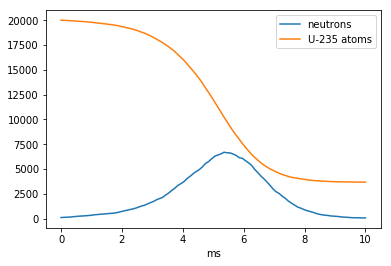

In [233]:
## YOUR CODE HERE
(N_n_t, N_U235_t) = run_reaction(100, 20000, 10000, np.linspace(0,10,100))
plt.plot(np.linspace(0,10,100), N_n_t, label='neutrons')
plt.plot(np.linspace(0,10,100), N_U235_t, label='U-235 atoms')
plt.xlabel('ms')
plt.legend()


### Part D (4 points)

The relative abundance of ${}^{235}U$ and ${}^{238}U$ on Earth has been changing over time, since ${}^{235}U$ decays more rapidly (it has a half-life of about 1 billion years, compared to 4 billion years for ${}^{238}U$.)  Today, the uranium in uranium ore contains about 0.7% ${}^{235}U$ compred to ${}^{238}U$.  Two billion years ago, the fraction of ${}^{235}U$ was higher - in fact, high enough in some rare instances to support a critical reaction!

Let's see the conditions needed and outcome for a super-critical reaction based on U-235 abundance.  __Set up and run two Monte Carlo simulations below__, comparing the reactions of three deposits of uranium atoms: the first deposit has 30% U-235 (sub-critical in our model), and the third deposit has 55% U-235.  

_Use the following conditions:_
- 1e6 total uranium atoms in each deposit;
- 1000 initial neutrons;
- Evolve the reaction for 60 microseconds.

__Make a plot showing the fraction of U-235 atoms vs. total uranium atoms__ over time for each simulation.



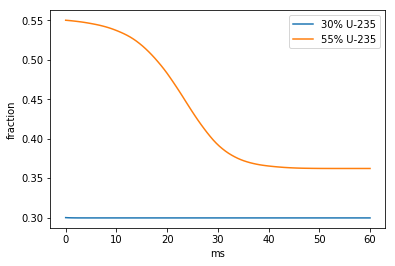

In [239]:
## YOUR CODE HERE
(N_n_t, N_U235_t) = run_reaction(1000, 1e6*0.3, 1e6*0.7, np.linspace(0,60,100))
plt.plot(np.linspace(0,60,100), N_U235_t/1e6, label = '30% U-235')

(N_n_t, N_U235_t) = run_reaction(1000, 1e6*0.55, 1e6*0.45, np.linspace(0,60,100))
plt.plot(np.linspace(0,60,100), N_U235_t/1e6, label = '55% U-235')

plt.ylabel('fraction')
plt.xlabel('ms')
plt.legend()

Our model is missing some physics details, including the production of plutonium as a byproduct of uranium reactions and some other important details.  In reality, a U-235 fraction of around 3% is needed to sustain criticality - consistent with the natural abundance on Earth two billion years ago.  In fact, such a "natural nuclear reactor" was famously discovered at [Oklo in Gabon](https://en.wikipedia.org/wiki/Natural_nuclear_fission_reactor).

One of the ways the Oklo site is known to have undergone nuclear reactions in the past is that the relative abundance of U-235 is _significantly lower_ in uranium ore from Oklo, compared to other sites around the world.  Using your plot above, __explain why__ Oklo should have a lower abundance of U-235 today.

_Type your answer here using Markdown._